In [1]:
import re
import sys
import csv
import time

# pd.set_option?
import pandas as pd
# 显示所有列 会卡顿
# pd.set_option('display.max_columns', None)
# 显示所有行 会卡顿
# pd.set_option('display.max_rows', None)
# 设置 value 的显示长度 默认为 50  会非常卡顿
# pd.set_option('max_colwidth',50)

import jieba
import numpy as np
from icecream import ic
from datetime import datetime
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt

# 词云
import stylecloud
from stylecloud import gen_stylecloud

# 相关性
import seaborn as sns

# solve err
sns.set_style("darkgrid",{"font.sans-serif":['KaiTi', 'Arial']})

## 评论区数据整理

In [22]:
comment_fname = r"D:\zhuomian\WeiBoTopic\Environment/data.csv"
comment = pd.read_csv(comment_fname,sep=',',engine='python').set_index('id')
comment

,bid,user_id,用户昵称,微博正文,头条文章url,发布位置,艾特用户,话题,转发数,评论数,点赞数,发布时间,发布工具,微博图片url,微博视频url,retweet_id
id,,,,,,,,,,,,,,,,
4.840000e+15,MfO5U69ra,6934544753,TURBO_迪力,世界杯盘点那些好听的世界杯主题曲🤗~2022年卡塔尔世界杯《HayyaHayya》🔥🔥🔥#卡...,NaN,NaN,NaN,"卡塔尔世界杯,世界杯主题曲,世界杯",1,0,5,2022/11/20 00:23,世界杯超话,NaN,http://f.video.weibocdn.com/u0/HVoRjUlzgx080UI...,NaN
4.840000e+15,MfO5PmlYP,2619726591,哎哟喂唷i,潘帕斯雄鹰必将翱翔在卡塔尔上空🇦🇷⚽️就想梅西夺冠，就想他封神，就想他捧起大力神杯如愿吧，如...,NaN,NaN,NaN,卡塔尔世界杯,0,3,1,2022/11/20 00:23,iPhone客户端,['https://wx2.sinaimg.cn/large/9c25daffly1h8aw...,NaN,NaN
4.840000e+15,MfO6weixu,2844948403,风影月悟,#卡塔尔世界杯#四年后东山再起加油阿根廷,NaN,NaN,NaN,卡塔尔世界杯,0,2,1,2022/11/20 00:25,HarmonyOS设备,['https://wx3.sinaimg.cn/large/a99277b3ly1h8aw...,NaN,NaN
4.840000e+15,MfO7sD1Lx,6081458415,卡布哒哒哒哒哒,世界杯这个主题曲真的一言难尽第一遍：什么玩意这是第二遍：好像还行第三遍：毒菇毒菇毒哒哒#卡塔...,NaN,NaN,NaN,"卡塔尔世界杯,世界杯主题曲",0,1,0,2022/11/20 00:27,iPhone 14 Pro,['https://wx1.sinaimg.cn/large/006Dzb8Xly1h8aw...,NaN,NaN
4.840000e+15,MfO7qlKwi,3835409455,bilpalalalal,今年我觉得巴西可能会赢#卡塔尔世界杯#,NaN,NaN,NaN,卡塔尔世界杯,0,1,1,2022/11/20 00:27,Android,['https://wx1.sinaimg.cn/large/e49bb42fgy1h8aw...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.840000e+15,MgyTStFnB,3882759549,可乐橘子气泡水,我记得你对我说过不止梅西帅，内马尔也超帅#卡塔尔世界杯#L可乐橘子气泡水的微博视频,NaN,NaN,NaN,卡塔尔世界杯,0,0,0,2022/11/24 23:34,iPhone客户端,NaN,http://f.video.weibocdn.com/o0/eqECzMfIlx0812D...,NaN
4.840000e+15,MgyTQabIZ,6267821803,偏爱三花的17喵,#卡塔尔世界杯##乌拉圭0比0韩国#双方势均力敌，🇰🇷甚至能把82踢红温了就是这俩队的反击看...,NaN,NaN,NaN,"卡塔尔世界杯,乌拉圭0比0韩国",0,0,0,2022/11/24 23:34,微博轻享版,NaN,NaN,NaN
4.840000e+15,MgyUH1D5C,3839059935,唐唐唐小勤,今天凌晨零点看C罗，3点看内马尔⚽#卡塔尔世界杯##C罗##内马尔#,NaN,宜宾,NaN,"卡塔尔世界杯,C罗,内马尔",0,0,0,2022/11/24 23:35,iPhone 12 Pro,['https://wx2.sinaimg.cn/large/e4d367dfgy1h8gn...,NaN,NaN


In [3]:
len(comment)

12748

In [4]:
# 去掉年份，以确保后面可视化的简洁
date_list1_clean = []
for each in comment['发布时间']:
    cancel = each.replace('2022/','')
    date_list1_clean.append(cancel)
    
len(date_list1_clean)

12748

In [21]:
dates = []
# 抽出日期进行转化
for day in date_list1_clean:
    current_date = datetime.strptime(day, '%m/%d %H:%M')
    dates.append(current_date)
dates

[datetime.datetime(1900, 11, 20, 0, 23),
 datetime.datetime(1900, 11, 20, 0, 23),
 datetime.datetime(1900, 11, 20, 0, 25),
 datetime.datetime(1900, 11, 20, 0, 27),
 datetime.datetime(1900, 11, 20, 0, 27),
 datetime.datetime(1900, 11, 20, 0, 28),
 datetime.datetime(1900, 11, 20, 0, 28),
 datetime.datetime(1900, 11, 20, 0, 30),
 datetime.datetime(1900, 11, 20, 0, 30),
 datetime.datetime(1900, 11, 20, 0, 31),
 datetime.datetime(1900, 11, 20, 0, 31),
 datetime.datetime(1900, 11, 20, 0, 31),
 datetime.datetime(1900, 11, 20, 0, 32),
 datetime.datetime(1900, 11, 20, 0, 32),
 datetime.datetime(1900, 11, 20, 0, 32),
 datetime.datetime(1900, 11, 20, 0, 32),
 datetime.datetime(1900, 11, 20, 0, 33),
 datetime.datetime(1900, 11, 20, 0, 34),
 datetime.datetime(1900, 11, 20, 0, 34),
 datetime.datetime(1900, 11, 20, 0, 34),
 datetime.datetime(1900, 11, 20, 0, 34),
 datetime.datetime(1900, 11, 20, 0, 35),
 datetime.datetime(1900, 11, 20, 0, 35),
 datetime.datetime(1900, 11, 20, 0, 36),
 datetime.dateti

In [20]:
dates1 = []

for each in dates:
    dates1.append(each.strftime('%m/%d'))
    
dates1

['11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',
 '11/20',


## 按天统计发贴个数

In [7]:
date_dict1 = {}

for date in dates1:
    date_dict1[date] = date_dict1.get(date, 0) + 1
date_dict1

{'11/20': 2240, '11/21': 3098, '11/22': 3234, '11/23': 2415, '11/24': 1761}

In [8]:
date_count = pd.DataFrame()
date_count["date"] = pd.to_datetime(comment['发布时间'])
date_count = date_count.set_index(date_count["date"])
date_count["count"] = 1

date_count.resample('D').sum().head()

,count
date,
2022-11-20,2240
2022-11-21,3098
2022-11-22,3234
2022-11-23,2415
2022-11-24,1761


In [9]:
for key, value in date_dict1.items():
    print('每日发帖量 '+ '2022/' + key + '： ' + str(value))

每日发帖量 2022/11/20： 2240
每日发帖量 2022/11/21： 3098
每日发帖量 2022/11/22： 3234
每日发帖量 2022/11/23： 2415
每日发帖量 2022/11/24： 1761


## 按小时统计

In [10]:
date_count.resample('H').sum()

,count
date,
2022-11-20 00:00:00,87
2022-11-20 01:00:00,50
2022-11-20 02:00:00,38
2022-11-20 03:00:00,27
2022-11-20 04:00:00,9
...,...
2022-11-24 19:00:00,98
2022-11-24 20:00:00,97
2022-11-24 21:00:00,98


In [13]:
# 日期序列化
dates1_df = pd.DataFrame({'日期': [key for key in date_dict1.keys()],
                        'Count': [value for value in date_dict1.values()]})
dates1_df

,日期,Count
0,11/20,2240
1,11/21,3098
2,11/22,3234
3,11/23,2415
4,11/24,1761


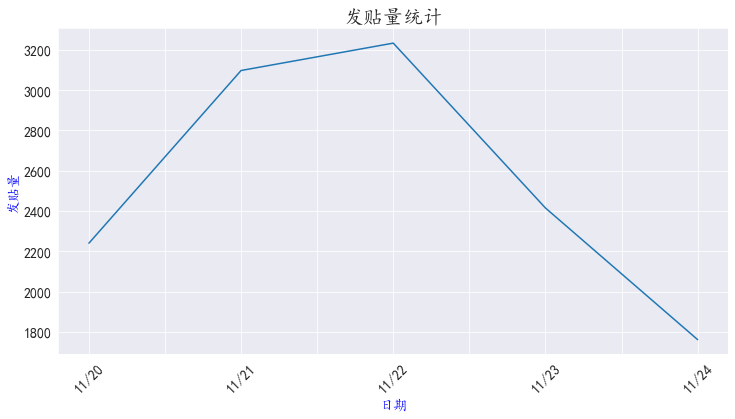

In [14]:
#设置标题，坐标轴标签参数
dates1_df[::].plot(kind = 'line',
              fontsize = 12,
              x = '日期',
              y = 'Count',
              figsize = (12,6),
              legend = None)
plt.title('发贴量统计', fontsize = 20)
plt.xlabel('日期', fontsize = 14, color = 'blue')
plt.xticks(rotation=45)
plt.ylabel('发贴量', fontsize = 14, color = 'blue')

# 设置刻度线
plt.tick_params(axis='both', labelsize=14)

# 设置网格
plt.grid(True)
plt.show()

## 话题标签频率

In [19]:
ht1_list = []
for line in comment['微博正文']:
    line_s = line.split('\n')

    for i in range(0, len(line_s)):
        if i == 0:
            lst = re.findall(r'(#.+?#)', line_s[i])
    
            if lst is not None:
                for each in lst:
                    ht1_list.append(each)
        
        if i == 2:
            lst = re.findall(r'(#.+?#)', line_s[i])
            
            if lst is not None:
                for each in lst:
                    ht1_list.append(each)
                    
ht1_list

['#卡塔尔世界杯#',
 '#世界杯主题曲#',
 '#世界杯#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#世界杯主题曲#',
 '#卡塔尔世界杯#',
 '#世界杯最强音#',
 '#中国移动视频彩铃#',
 '#卡塔尔世界杯#',
 '#2022世界杯#',
 '#C罗#',
 '#内马尔#',
 '#哈弗茨#',
 '#格雷茨卡#',
 '#卡塔尔世界杯#',
 '#世界杯#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#重庆市民可免费观看世界杯#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#梅西#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#音乐现场#',
 '#音乐房子#',
 '#世界杯主题曲#',
 '#世界杯#',
 '#FIFA世界杯#',
 '#卡塔尔世界杯#',
 '#世界杯32强巡礼#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#不止旅行#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#世界杯球迷主题曲发布#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#重庆市民可免费观看世界杯#',
 '#世界杯开幕式#',
 '#卡塔尔世界杯#',
 '#世界杯倒计时1天#',
 '#卡塔尔世界杯#',
 '#梅西#',
 '#阿根廷队加油#',
 '#世界杯#',
 '#卡塔尔世界杯开幕#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#世界杯预言家已上线#',
 '#卡塔尔世界杯#',
 '#吐槽个球#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#世界杯#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#世界杯#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#世界杯专栏星推官#',
 '#卡塔尔世界杯#',
 '#世界杯#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#卡塔尔世界杯#',
 '#卡

In [16]:
average =len(ht1_list) / len(comment)
print('平均每个帖子包含的话题标签: ' + str(average))

平均每个帖子包含的话题标签: 2.100564794477565


In [18]:
ht1_fre = {}

for tag in ht1_list:
    ht1_fre[tag] = ht1_fre.get(tag, 0) + 1
ht1_fre

{'#卡塔尔世界杯#': 12695,
 '#世界杯主题曲#': 11,
 '#世界杯#': 2412,
 '#世界杯最强音#': 1,
 '#中国移动视频彩铃#': 2,
 '#2022世界杯#': 53,
 '#C罗#': 64,
 '#内马尔#': 92,
 '#哈弗茨#': 6,
 '#格雷茨卡#': 4,
 '#重庆市民可免费观看世界杯#': 6,
 '#梅西#': 325,
 '#音乐现场#': 1,
 '#音乐房子#': 1,
 '#FIFA世界杯#': 189,
 '#世界杯32强巡礼#': 1,
 '#不止旅行#': 5,
 '#世界杯球迷主题曲发布#': 1,
 '#世界杯开幕式#': 339,
 '#世界杯倒计时1天#': 4,
 '#阿根廷队加油#': 47,
 '#卡塔尔世界杯开幕#': 9,
 '#世界杯预言家已上线#': 35,
 '#吐槽个球#': 30,
 '#世界杯专栏星推官#': 15,
 '#猎奇#': 1,
 '#搞笑#': 9,
 '#足球#': 393,
 '#2022卡塔尔世界杯#': 111,
 '#名字变变变#': 3,
 '#卡塔尔世界杯纯球迷#': 3,
 '#你好卡塔尔#': 15,
 '#卡塔尔民众点赞中国大巴#': 8,
 '#世界杯开幕#': 12,
 '#巴西队加油#': 19,
 '#内马尔加油#': 4,
 '#世界杯冠军#': 2,
 '#田柾国#': 37,
 '#围观世界杯#': 312,
 '#c罗#': 51,
 '#阿根廷国家队#': 11,
 '#VamosArgentina#': 4,
 '#迪巴拉#': 2,
 '#劳塔罗#': 1,
 '#埃米里亚诺马丁内斯#': 1,
 '#恩佐.费尔南德斯#': 1,
 '#莫利纳#': 1,
 '#体育之家赛事分享#': 6,
 '#卡塔尔世界杯进入倒计时，宿舍准备完成，#': 3,
 '#阿根廷#': 101,
 '#procreate绘画#': 1,
 '#加拿大晋级世界杯#': 1,
 '#本人微博解禁#': 1,
 '#2022世界杯小组赛卡塔尔vs厄瓜多尔#': 2,
 '#卡塔尔世界杯新星系列#': 4,
 '#梅西与C罗一起拍广告#': 1,
 '#上微博看世界杯#': 1,
 '#好物推荐#': 17,
 '#卡塔尔世界杯

In [13]:
ht1_df = pd.DataFrame({'Hashtag': [user for user in ht1_fre.keys()],
                      'Count': [count for count in ht1_fre.values()]})

ht1_df = ht1_df.sort_values('Count', ascending=False).reset_index(drop=True)
ht1_df

,Hashtag,Count
0,#卡塔尔世界杯#,12695
1,#世界杯#,2412
2,#足球#,393
3,#阿根廷vs沙特阿拉伯#,385
4,#德国vs日本#,342
...,...,...
3198,#汪小菲再曝许雅钧养小三#,1
3199,#手绘头像#,1
3200,#社会新闻#,1
3201,#6:2#,1


In [19]:
count_less3 = 0
count_more10 = 0

for i in range(0,len(ht1_df)):
    if ht1_df['Count'][i] < 3:
        count_less3 += 1
    if ht1_df['Count'][i] > 10:
        count_more10 += 1
        
print('数据集共使用了 ' + str(len(ht1_df)) + ' 种标签\n')
print('使用数小于三次的标签数共有：' + str(count_less3) + '种 \t 占比：' + str(count_less3/len(ht1_df)))
print('使用数大于十次的标签数共有：' + str(count_more10) + '种 \t 占比：' + str(count_more10/len(ht1_df)))

数据集共使用了 3203 种标签

使用数小于三次的标签数共有：2633种 	 占比：0.8220418357789572
使用数大于十次的标签数共有：140种 	 占比：0.04370902279113331


# 话题top10

In [20]:
ht1_df.nlargest(10, 'Count')

,Hashtag,Count
0,#卡塔尔世界杯#,12695
1,#世界杯#,2412
2,#足球#,393
3,#阿根廷vs沙特阿拉伯#,385
4,#德国vs日本#,342
5,#世界杯开幕式#,339
6,#梅西#,325
7,#围观世界杯#,312
8,#英格兰vs伊朗#,299
9,#卡塔尔vs厄瓜多尔#,250


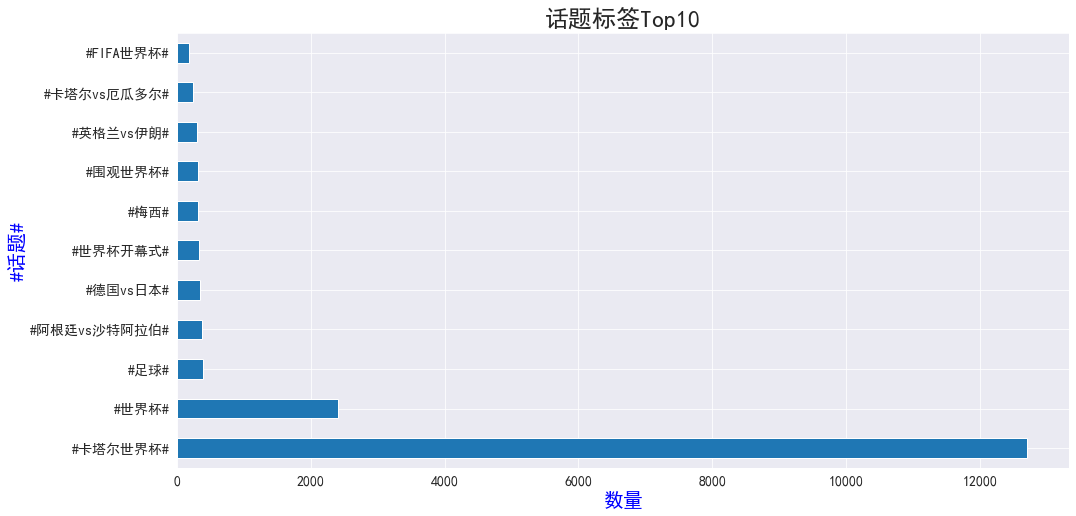

In [21]:
ht1_df.nlargest(11, 'Count').plot(kind = 'barh', 
            fontsize = 12,
            x = 'Hashtag',
            y = 'Count',
            figsize = (16,8),
            legend = None)

plt.title('话题标签Top10', fontsize = 24)
plt.xlabel('数量', fontsize = 20, color = 'blue')
plt.ylabel('#话题#', fontsize = 20, color = 'blue')
plt.tick_params(axis='both', labelsize=14)

plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

plt.show()

## @艾特数研究

In [22]:
# 找出所有 @
mt1_list = []

for line in comment['微博正文']:
    line_s = line.split('\n')
    
    for i in range(0, len(line_s)):
        if i == 0:
            lst = re.findall(r'(@.+?):', line_s[i])
#             print(lst)

            if lst is not None:
                for each in lst:
                    mt1_list.append(each)

        if i == 1:
            lst = re.findall(r'原始用户: (.+)',line_s[i])
#             print(lst)

            if lst is not None:
                for each in lst:
                    mt1_list.append('@' + each)

        if i == 2:
            lst = re.findall(r'(@.+?) ', line_s[i])
#             print(lst)

            if lst is not None:
                for each in lst:
                    mt1_list.append(each)
                    
mt1_list

['@腼腆的腼腆的@绿洲动态',
 '@新浪体育#世界杯开幕式提前一小时##世界杯开幕式#2022年卡塔尔世界杯开幕式提前一小时，将于北京时间今晚22',
 '@人民日报【正在直播：#一起等待世界杯开幕#】卡塔尔世界杯开赛在即，北京时间21日00',
 '@林梦鸽卡塔尔0',
 '@欧陽龍森的@绿洲动态',
 '@地球镜头A',
 '@粘仔麻袋',
 '@乔乔妹妹',
 '@FIFA世界杯请查收#FIFA世界杯#第二比赛日战报📧🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f英格兰6',
 '@OnlyBayern',
 '@用户7774662906的表态',
 '@人民执法监督员',
 '@骑桶人',
 '@骑桶人',
 '@欧陽龍森的@绿洲动态',
 '@欧陽龍森的@绿洲动态',
 '@香菜果子狸bayern是实习女巫',
 '@施魏因斯泰格吧',
 '@OnlyBayern',
 '@乔乔妹妹',
 '@黄健翔',
 '@黄健翔',
 '@共青团西南医科大学委员会微博//@西南医科大人文与管理学院分团委',
 '@智恒充电柜',
 '@金达官方微博',
 '@智恒充电柜',
 '@智恒充电柜',
 '@智恒充电柜',
 '@雪荞品牌',
 '@雪荞品牌',
 '@智恒充电柜',
 '@智恒充电柜',
 '@共青团西南医科大学委员会微博//@西南医科大人文与管理学院分团委',
 '@智恒充电柜',
 '@雪荞品牌',
 '@金达官方微博',
 '@智恒充电柜',
 '@雪荞品牌',
 '@共青团西南医科大学委员会微博//@西南医科大人文与管理学院分团委',
 '@共青团西南医科大学委员会微博//@西南医科大人文与管理学院分团委',
 '@金达官方微博',
 '@华图教师官微//@华图教师官微',
 '@苗观云起',
 '@智恒充电柜',
 '@智恒充电柜',
 '@雪荞品牌',
 '@雪荞品牌',
 '@巢巢巢巢巢Even',
 '@旭輝鑫·峻康微语',
 '@拜仁小琦',
 '@雪荞品牌',
 '@智恒充电柜',
 '@雪荞品牌',
 '@雪荞品牌',
 '@共青团西南医科大学委员会微博//@西南医科大人文与管理学院分团委',
 '@旭輝鑫·峻康微语',
 '@南昌校园@微博校园出品']

In [23]:
mt1_fre = {}

for user in mt1_list:
    mt1_fre[user] = mt1_fre.get(user, 0) +1
    
mt1_fre

{'@腼腆的腼腆的@绿洲动态': 1,
 '@新浪体育#世界杯开幕式提前一小时##世界杯开幕式#2022年卡塔尔世界杯开幕式提前一小时，将于北京时间今晚22': 1,
 '@人民日报【正在直播：#一起等待世界杯开幕#】卡塔尔世界杯开赛在即，北京时间21日00': 1,
 '@林梦鸽卡塔尔0': 1,
 '@欧陽龍森的@绿洲动态': 3,
 '@地球镜头A': 1,
 '@粘仔麻袋': 1,
 '@乔乔妹妹': 2,
 '@FIFA世界杯请查收#FIFA世界杯#第二比赛日战报📧🏴\U000e0067\U000e0062\U000e0065\U000e006e\U000e0067\U000e007f英格兰6': 1,
 '@OnlyBayern': 2,
 '@用户7774662906的表态': 1,
 '@人民执法监督员': 1,
 '@骑桶人': 2,
 '@香菜果子狸bayern是实习女巫': 1,
 '@施魏因斯泰格吧': 1,
 '@黄健翔': 2,
 '@共青团西南医科大学委员会微博//@西南医科大人文与管理学院分团委': 5,
 '@智恒充电柜': 11,
 '@金达官方微博': 3,
 '@雪荞品牌': 9,
 '@华图教师官微//@华图教师官微': 1,
 '@苗观云起': 1,
 '@巢巢巢巢巢Even': 1,
 '@旭輝鑫·峻康微语': 2,
 '@拜仁小琦': 1,
 '@南昌校园@微博校园出品': 1}

In [24]:
average = len(mt1_list) / len(comment)

print('所有帖子共体艾特次数 \t' + str(len(mt1_fre)))
print('平均每个帖子提到 \t' + str(average) + ' 个用户')

所有帖子共体艾特次数 	26
平均每个帖子提到 	0.004471289614057107 个用户


In [25]:
mt1_df = pd.DataFrame({'用户': [user for user in mt1_fre.keys()],
                      'Count': [count for count in mt1_fre.values()]})

mt1_df = mt1_df.sort_values('Count', ascending=False).reset_index(drop=True)
mt1_df

,用户,Count
0,@智恒充电柜,11
1,@雪荞品牌,9
2,@共青团西南医科大学委员会微博//@西南医科大人文与管理学院分团委,5
3,@欧陽龍森的@绿洲动态,3
4,@金达官方微博,3
5,@黄健翔,2
6,@旭輝鑫·峻康微语,2
7,@乔乔妹妹,2
8,@OnlyBayern,2
9,@骑桶人,2


## 艾特数Top5

In [26]:
mt1_df.nlargest(5, 'Count')

,用户,Count
0,@智恒充电柜,11
1,@雪荞品牌,9
2,@共青团西南医科大学委员会微博//@西南医科大人文与管理学院分团委,5
3,@欧陽龍森的@绿洲动态,3
4,@金达官方微博,3


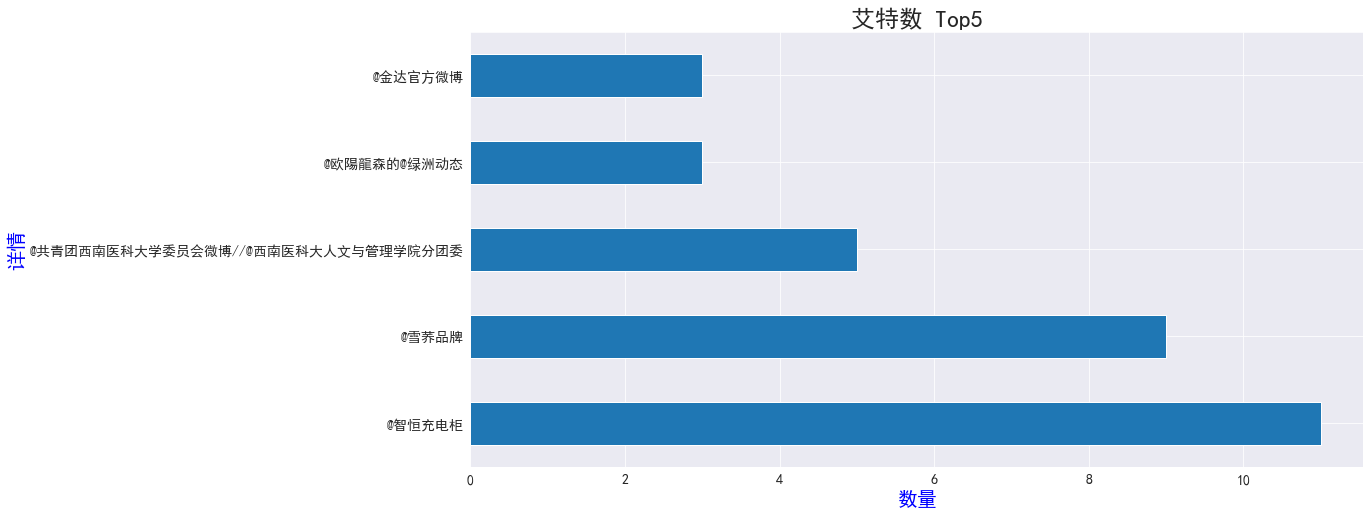

In [27]:
mt1_df.nlargest(5, 'Count').plot(kind = 'barh', 
            fontsize = 12,
            x = '用户',
            y = 'Count',
            figsize = (16,8),
            legend = None)

plt.title('艾特数 Top5', fontsize = 24)
plt.xlabel('数量', fontsize = 20, color = 'blue')
plt.ylabel('详情', fontsize = 20, color = 'blue')
plt.tick_params(axis='both', labelsize=14)

plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

plt.show()

# 用户研究 转发、点赞和评论

## 用户回复数时间线

In [14]:
combine1_df = pd.DataFrame({'Date': date_list1_clean,
                    'Content': comment['微博正文'],
                   'Repost': comment['转发数'],
                   'Like': comment['点赞数'],
                   'Comment': comment['评论数']
                           })
combine1_df

,Date,Content,Repost,Like,Comment
id,,,,,
4.840000e+15,11/20 00:23,世界杯盘点那些好听的世界杯主题曲🤗~2022年卡塔尔世界杯《HayyaHayya》🔥🔥🔥#卡...,1,5,0
4.840000e+15,11/20 00:23,潘帕斯雄鹰必将翱翔在卡塔尔上空🇦🇷⚽️就想梅西夺冠，就想他封神，就想他捧起大力神杯如愿吧，如...,0,1,3
4.840000e+15,11/20 00:25,#卡塔尔世界杯#四年后东山再起加油阿根廷,0,1,2
4.840000e+15,11/20 00:27,世界杯这个主题曲真的一言难尽第一遍：什么玩意这是第二遍：好像还行第三遍：毒菇毒菇毒哒哒#卡塔...,0,0,1
4.840000e+15,11/20 00:27,今年我觉得巴西可能会赢#卡塔尔世界杯#,0,1,1
...,...,...,...,...,...
4.840000e+15,11/24 23:34,我记得你对我说过不止梅西帅，内马尔也超帅#卡塔尔世界杯#L可乐橘子气泡水的微博视频,0,0,0
4.840000e+15,11/24 23:34,#卡塔尔世界杯##乌拉圭0比0韩国#双方势均力敌，🇰🇷甚至能把82踢红温了就是这俩队的反击看...,0,0,0
4.840000e+15,11/24 23:35,今天凌晨零点看C罗，3点看内马尔⚽#卡塔尔世界杯##C罗##内马尔#,0,0,0


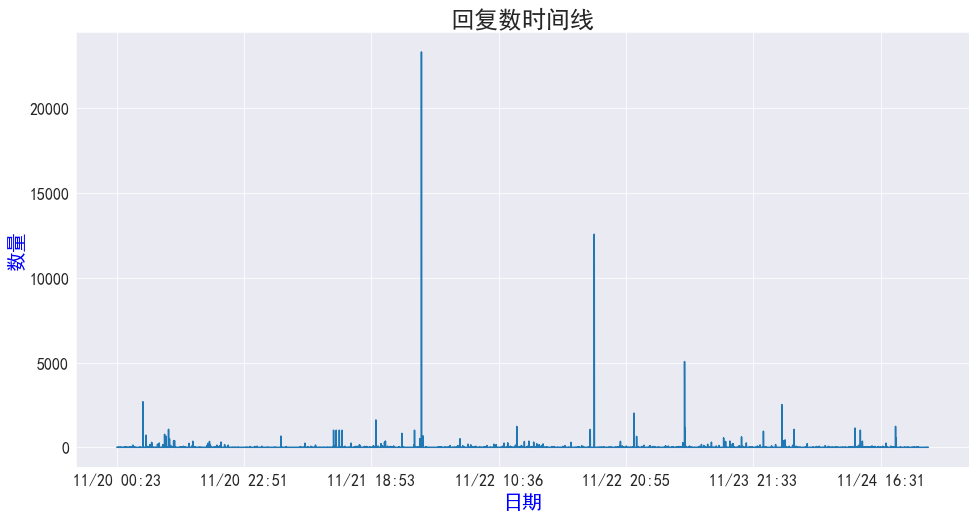

In [29]:
combine1_df[::].plot(kind = 'line', 
                  x = 'Date',
                  y = 'Repost', # 需要修改
                  fontsize = 12,
                 figsize = (16,8),
                 legend = None)
plt.title('回复数时间线', fontsize = 24)
plt.xlabel('日期', fontsize = 20, color = 'blue')
plt.ylabel('数量', fontsize = 20, color = 'blue')
plt.tick_params(axis='both', labelsize=16)
plt.grid(True)
plt.show()

## 评论数时间线

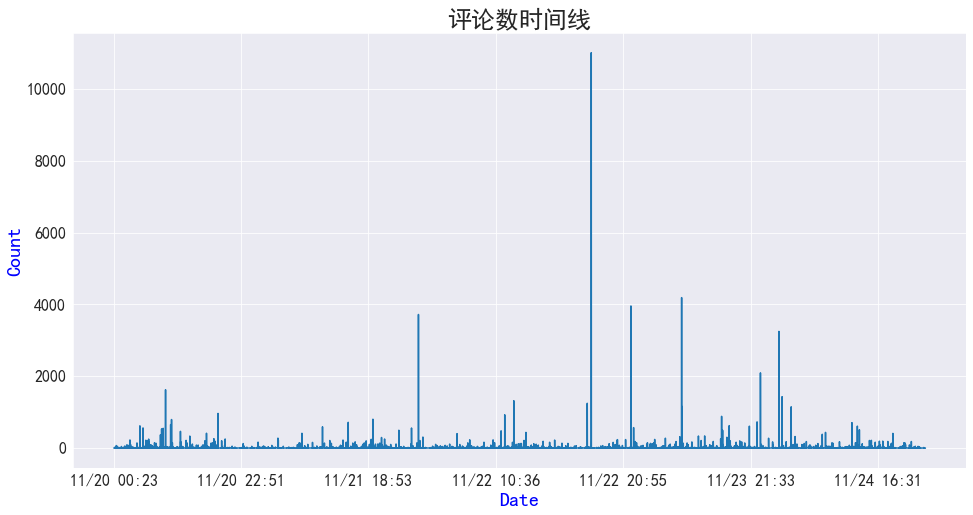

In [30]:
combine1_df[::].plot(kind = 'line', 
                  x = 'Date',
                  y = 'Comment',
                  fontsize = 12,
                 figsize = (16,8),
                 legend = None)
plt.title('评论数时间线', fontsize = 24)
plt.xlabel('Date', fontsize = 20, color = 'blue')
plt.ylabel('Count', fontsize = 20, color = 'blue')
plt.tick_params(axis='both', labelsize=16)
plt.grid(True)
plt.show()

## 引发热门评论帖子 Top5

In [31]:
number = 0

print('The top 5 most Comment posts are:')

while number != 5:
    print('\nNo.' + str(number+1) + '.')
    print('Date: ' + combine1_df.sort_values('Comment', ascending=False).reset_index(drop=True)['Date'][number])
    print('Comment Count: ' + str(combine1_df.sort_values('Comment', ascending=False).reset_index(drop=True)['Comment']
                                  [number]))
    print('Content: \n' + combine1_df.sort_values('Comment', ascending=False).reset_index(drop=True)['Content'][number])
    number += 1

The top 5 most Comment posts are:

No.1.
Date: 11/22 20:07
Comment Count: 11009
Content: 
【#沙特赢了#】刚刚，卡塔尔世界杯，沙特阿拉伯2比1击败阿根廷！#阿根廷爆冷##沙特守门员#

No.2.
Date: 11/23 08:07
Comment Count: 4189
Content: 
世界杯小王子表情包～

No.3.
Date: 11/23 07:10
Comment Count: 4155
Content: 
【#世界杯随处可见中国元素#】揭幕战入场仪式上的中国护旗手、乘专机抵达卡塔尔的大熊猫“京京”“四海”、中国企业承建的卡塔尔世界杯主体育场、热销的世界杯纪念品，#2022卡塔尔世界杯#赛场内外，有太多与中国相关的元素。看↓↓

No.4.
Date: 11/22 21:37
Comment Count: 3956
Content: 
理顺了一个关系：霸总是饺子皮的哥哥霸总已婚，1个老婆8个孩子饺子皮，今年才15岁#卡塔尔世界杯#

No.5.
Date: 11/21 22:33
Comment Count: 3719
Content: 
#英格兰vs伊朗#壮观！看台上的众多伊朗球迷集体为伊朗女性发声！#世界杯##卡塔尔世界杯#


## 引发热门回复帖子 Top5

In [33]:
number = 0
print('The top 5 most REPOST posts are:')
while number != 5:
    print('\nNo.' + str(number+1) + '.')
    print('日期: \t\t' + combine1_df.sort_values('Repost', ascending=False).reset_index(drop=True)['Date'][number])
    print('回复数: \t' + str(combine1_df.sort_values('Repost', ascending=False).reset_index(drop=True)['Repost'][number]))
    print('内容: \t\t' + combine1_df.sort_values('Repost', ascending=False).reset_index(drop=True)['Content'][number])
    number += 1

The top 5 most REPOST posts are:

No.1.
日期: 		11/21 22:33
回复数: 	23327
内容: 		#英格兰vs伊朗#壮观！看台上的众多伊朗球迷集体为伊朗女性发声！#世界杯##卡塔尔世界杯#

No.2.
日期: 		11/22 20:07
回复数: 	12572
内容: 		【#沙特赢了#】刚刚，卡塔尔世界杯，沙特阿拉伯2比1击败阿根廷！#阿根廷爆冷##沙特守门员#

No.3.
日期: 		11/23 07:10
回复数: 	5058
内容: 		【#世界杯随处可见中国元素#】揭幕战入场仪式上的中国护旗手、乘专机抵达卡塔尔的大熊猫“京京”“四海”、中国企业承建的卡塔尔世界杯主体育场、热销的世界杯纪念品，#2022卡塔尔世界杯#赛场内外，有太多与中国相关的元素。看↓↓

No.4.
日期: 		11/23 08:07
回复数: 	4047
内容: 		世界杯小王子表情包～

No.5.
日期: 		11/20 14:37
回复数: 	2689
内容: 		【关注+转发，11.30抽10人平分500元JD卡】2022#卡塔尔世界杯#狂热来袭！激情灵魂，技术典范，九号电动滑板车作为西班牙国家队专属交通工具，与斗牛士们一同奔赴足球盛宴，向世界杯最高宝座发起冲击！#骑妙出行一起九号#O抽奖详情


In [15]:
combine1_df.sort_values('Comment', ascending=False)['Content']

id
4.840000e+15       【#沙特赢了#】刚刚，卡塔尔世界杯，沙特阿拉伯2比1击败阿根廷！#阿根廷爆冷##沙特守门员#
4.838880e+15                                           世界杯小王子表情包～
4.838860e+15    【#世界杯随处可见中国元素#】揭幕战入场仪式上的中国护旗手、乘专机抵达卡塔尔的大熊猫“京京”...
4.840000e+15     理顺了一个关系：霸总是饺子皮的哥哥霸总已婚，1个老婆8个孩子饺子皮，今年才15岁#卡塔尔世界杯#
4.840000e+15        #英格兰vs伊朗#壮观！看台上的众多伊朗球迷集体为伊朗女性发声！#世界杯##卡塔尔世界杯#
                                      ...                        
4.840000e+15    微博小雪映万物，天地今始白。今日小雪，冬日寒风瑟瑟，要注意调整心态，保持好心情呀！愿你寒冬有...
4.840000e+15    中国#卡塔尔世界杯#当地时间21日，2022世界杯小组赛B组首轮，英格兰6比2大胜伊朗，收获...
4.840000e+15    中国21日，中国石化与卡塔尔能源公司签署了为期27年的液化天然气（LNG）长期购销协议。卡塔...
4.840000e+15    #卡塔尔世界杯##如何看待中国制造席卷世界杯#中国除了中国队没去其他都去了！中国制造最亮眼的...
4.840000e+15    11.24又菜又爱看又爱玩就是我#卡塔尔世界杯#咱就估摸着～两哥也在看朱一龙#朱一龙#胡歌#胡歌#
Name: Content, Length: 12748, dtype: object

## 回复时间线

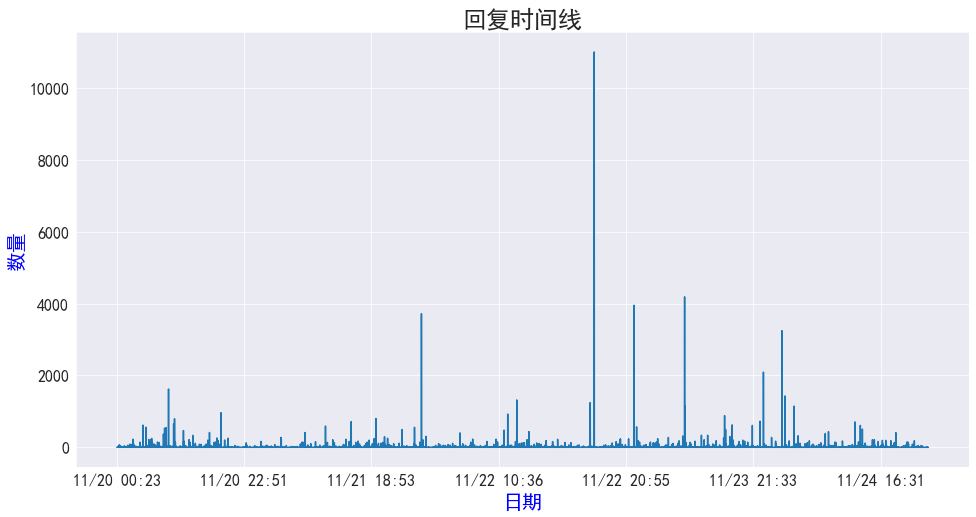

In [35]:
combine1_df[::].plot(kind = 'line', 
                  x = 'Date',
                  y = 'Comment',
                  fontsize = 12,
                 figsize = (16,8),
                 legend = None)
plt.title('回复时间线', fontsize = 24)
plt.xlabel('日期', fontsize = 20, color = 'blue')
plt.ylabel('数量', fontsize = 20, color = 'blue')
plt.tick_params(axis='both', labelsize=16)
plt.grid(True)
plt.show()

## 评论区数据点赞数排序

In [36]:
mean_ratings = comment.pivot_table(index='id',values=['转发数','评论数','点赞数']).sort_values(by='点赞数', ascending=False)
mean_ratings.head(10)

,点赞数,评论数,转发数
id,,,
4.838880e+15,46842.000000,4189.000000,4047.000000
4.838960e+15,2071.000000,191.000000,196.000000
4.838890e+15,980.000000,981.000000,1535.000000
4.838860e+15,793.870968,145.419355,172.774194
4.838910e+15,369.000000,1160.000000,1162.000000
4.839100e+15,342.918089,30.924915,19.897611
4.838840e+15,186.648649,2.702703,3.054054
4.838920e+15,156.000000,83.500000,86.500000
4.838790e+15,128.250000,9.093750,3.343750


## 评论内容字符数大小

In [37]:
a = b = c = d = 0

for i in comment['微博正文']:
    n = len(i)
    if 0 < n < 20:
        a+=1
    elif 20 <= n < 50:
        b+=1
    elif 50 <= n < 100:
        c+=1
    else :
        d+=1

print("评论内容字符数大小统计：")
print("字符数小于20的有：{}个 \t 占比:{:.2f}".format(a,a/len(comment)))
print("字符数20<=n<50的有：{}个 \t 占比:{:.2f}".format(b,b/len(comment)))
print("字符数50<=n<100的有：{}个 \t 占比:{:.2f}".format(c,c/len(comment)))
print("字符数大于100的有：{}个 \t 占比:{:.2f}".format(d,d/len(comment)))

评论内容字符数大小统计：
字符数小于20的有：1649个 	 占比:0.13
字符数20<=n<50的有：5126个 	 占比:0.40
字符数50<=n<100的有：3554个 	 占比:0.28
字符数大于100的有：2419个 	 占比:0.19


## 综合回复数，点赞数，评论数三项

In [16]:
repost1 = pd.Series(data = combine1_df[::-1]['Repost'].values, index = combine1_df[::-1]['Date'])
like1 = pd.Series(data = combine1_df[::-1]['Like'].values, index = combine1_df[::-1]['Date'])
comment1 = pd.Series(data = combine1_df[::-1]['Comment'].values, index = combine1_df[::-1]['Date'])

repost1

Date
11/24 23:35    0
11/24 23:35    0
11/24 23:35    0
11/24 23:34    0
11/24 23:34    0
              ..
11/20 00:27    0
11/20 00:27    0
11/20 00:25    0
11/20 00:23    0
11/20 00:23    1
Length: 12748, dtype: int64

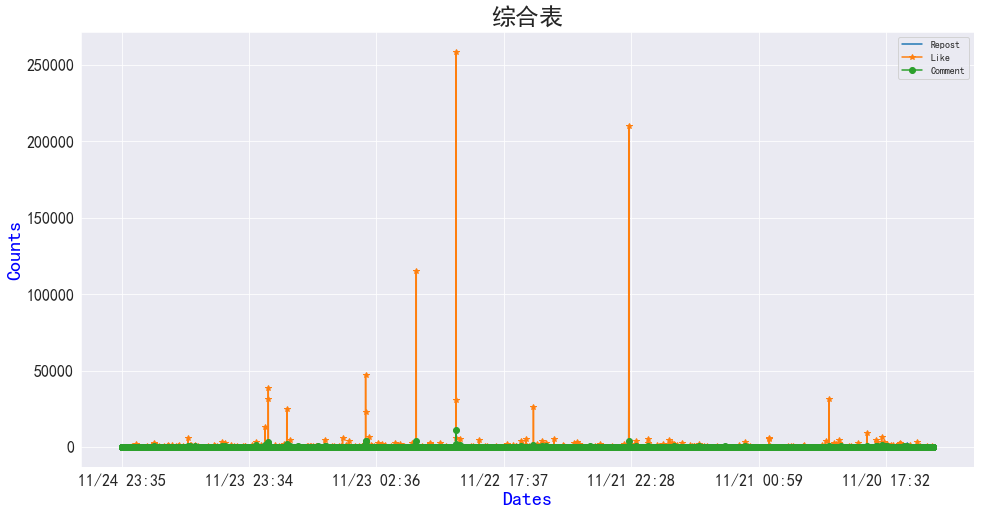

In [39]:
repost1.plot(figsize = (16,8), label = "Repost", legend = True) # Provide different marker for each plot.
like1.plot(figsize = (16,8), label = "Like", legend = True, marker = '*')
comment1.plot(figsize = (16,8), label = "Comment", legend = True, marker = 'o')

plt.title('综合表', fontsize = 24)
plt.xlabel('Dates', fontsize = 20, color = 'blue')
plt.ylabel('Counts', fontsize = 20, color = 'blue')
plt.tick_params(axis='both', labelsize=16)
plt.show()

# 数据分析及可视化

### 评论区热图

In [17]:
yuntu_data = pd.DataFrame({'user_id':comment['user_id'],'点赞数':comment['点赞数'],'评论数':comment['评论数'],'转发数':comment['转发数']})
yuntu_data

,user_id,点赞数,评论数,转发数
id,,,,
4.840000e+15,6934544753,5,0,1
4.840000e+15,2619726591,1,3,0
4.840000e+15,2844948403,1,2,0
4.840000e+15,6081458415,0,1,0
4.840000e+15,3835409455,1,1,0
...,...,...,...,...
4.840000e+15,3882759549,0,0,0
4.840000e+15,6267821803,0,0,0
4.840000e+15,3839059935,0,0,0


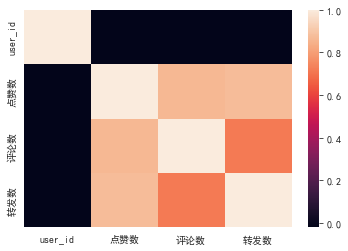

In [41]:
correlations = yuntu_data.corr()
sns.heatmap(correlations)
plt.show()

### 评论关键字频率云图

In [59]:
comment_fname = r"D:\zhuomian\WeiBoTopic\Environment/data.csv"
comment = pd.read_csv(comment_fname,sep=',',engine='python')
word_list = jieba.cut(str(comment['微博正文']))
result = " ".join(word_list) # 分词用 隔开
# 制作中文云词
gen_stylecloud(text=result,
           font_path='C:\\Windows\\Fonts\\simhei.ttf',
           output_name='D:\zhuomian\WeiBoTopic\Result\comment_yuntu.png',
           icon_name='fas fa-bell'
           ) # 必须加中文字体，否则格式错误